# Tools used

- This python package pulls data from the sqlite database that stores messages: https://github.com/toffer/iphone-sms-backup

- You have to plug your phone into your computer and backup locally via iTunes to access it (I don't think it works with icloud backups directly)

- This command puts the messages in JSON format (there are other options available): `./sms-backup.py -m Matt -p "6178998317" -p "4136879085" --alias "413-687-9085=Alice" --format json -o matt_alice.json`

- This is an easy to use word cloud package: https://github.com/amueller/word_cloud

- This package helps with parsing emojis: https://github.com/seandolinar/socialmediaparse

# Can you recover deleted iMessages?

- possible option for mining the OS X Messages.app database https://github.com/alexwlchan/imessage-archive

- a couple more options: http://apple.stackexchange.com/questions/108171/export-imessages-in-human-readable-form-for-archival

- $30 software: https://deciphertools.com/decipher-textmessage.html

- $50 software: http://www.imobie.com/support/retrieve-deleted-text-messages-on-iphone.htm

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [64]:
# sns.set_style("darkgrid")
sns.set_style("whitegrid")

In [3]:
# 12 colors from colorbrewer2.org
# colors = [(166,206,227), (31,120,180), (178,223,138), (51,160,44), (251,154,153), (227,26,28), (253,191,111), (255,127,0), (202,178,214), (106,61,154), (255,255,153), (177,89,40)]

# 26 colors from http://graphicdesign.stackexchange.com/questions/3682/where-can-i-find-a-large-palette-set-of-contrasting-colors-for-coloring-many-d
colors = [(240,163,255), (0,117,220), (153,63,0), (76,0,92), (25,25,25), (0,92,49), (43,206,72), (255,204,153), (128,128,128), (148,255,181), (143,124,0), (157,204,0), (194,0,136), (0,51,128), (255,164,5), (255,168,187), (66,102,0), (255,0,16), (94,241,242), (0,153,143), (224,255,102), (116,10,255), (153,0,0), (255,255,128), (255,255,0), (255,80,5)]

colors = sns.color_palette(list(tuple(i / 255.0 for i in inner) for inner in colors), n_colors=len(colors))

# view the colors
# sns.palplot(colors)

# need to run this for each plot
# ax.set_color_cycle(colors)

In [4]:
data_date = 'June 24, 2015'

df = pd.read_json('matt_alice.json', convert_dates=['date'])

df = df.set_index(['date'])

# exclude that time I messed with a texting bug

# before "2013-08-29 22:02:44"
# after "2013-08-29 22:15:44"

df = df[(df.index < pd.datetime(2013, 8, 29, 22, 2, 0)) | (df.index > pd.datetime(2013, 8, 29, 22, 16, 0))]

In [5]:
df.head(10)

,from,text,to
date,,,
2012-07-21 16:29:26,Alice,Hi this is alice! Find any good shows?,Matt
2012-07-21 16:31:55,Matt,Hey! Haven't been to anything yet today. You d...,Alice
2012-07-21 16:41:02,Alice,"Yep, just got here. Let me know when you're free!",Matt
2012-07-21 18:37:34,Matt,Hey what's your 8pm show plan?,Alice
2012-07-21 18:41:48,Alice,"Not sure yet, I'm currently at the skylark whi...",Matt
2012-07-21 18:49:50,Matt,Also unsure. Heading south though so we'll pop...,Alice
2012-07-22 16:01:44,Alice,Hey it was really nice to meet you. See any ot...,Matt
2012-07-22 16:04:20,Matt,"You too! Yeah, Tin Horn Prayer and A. Tom Coll...",Alice
2012-07-22 18:02:14,Matt,Oh if you're going tonight you should see Gora...,Alice


In [6]:
df.tail(10)

,from,text,to
date,,,
2015-06-24 09:02:29,Matt,"Anyway, I'm at the gate, ready to fly! Hope I ...",Alice
2015-06-24 09:04:05,Alice,"Hooray, see you so soon!! 💍👞👖👕💼📘",Matt
2015-06-24 09:09:02,Matt,Got em all!,Alice
2015-06-24 09:13:21,Alice,"Have a good flight, love you!",Matt
2015-06-24 09:18:34,Matt,Love you too!,Alice
2015-06-24 09:53:29,Matt,Are you picking me up at the airport?,Alice
2015-06-24 09:53:38,Alice,Yep,Matt
2015-06-24 09:54:02,Matt,Woo thanks :) ok bye!,Alice
2015-06-24 09:54:30,Matt,Oh bring a snack if you have anything. I'm alr...,Alice


In [7]:
n_alice = df[df['from'] == 'Alice']['from'].shape
n_matt = df[df['from'] == 'Matt']['from'].shape

print 'Alice has sent %d messages' % (n_alice)
print 'Matt has sent %d messages' % (n_matt)

Alice has sent 8114 messages
Matt has sent 7802 messages


In [8]:
df.plot?

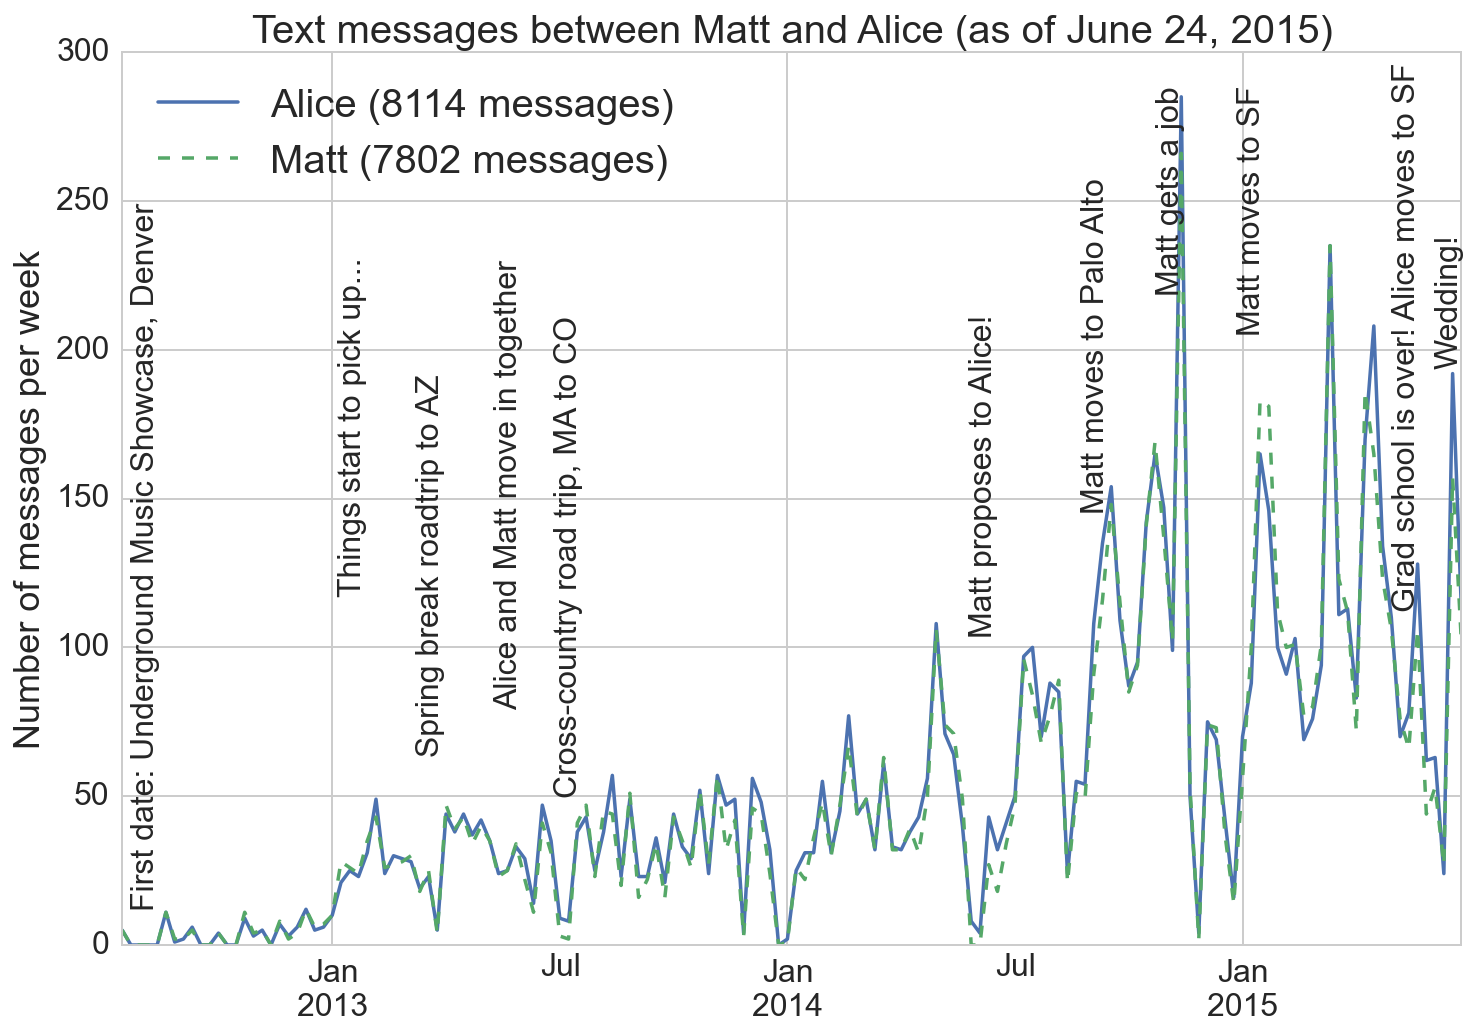

In [65]:
fig, ax = plt.subplots(figsize=(12,8));

a = df[df['from'] == 'Alice']['from'].resample('W', how='count').plot(ax=ax, kind='line', fontsize=16);
m = df[df['from'] == 'Matt']['from'].resample('W', how='count').plot(ax=ax, kind='line', fontsize=16, style=['--']);

ax.legend(('Alice (%d messages)' % (n_alice), 'Matt (%d messages)' % (n_matt)), loc='upper left', fontsize=20);

ax.set_title('Text messages between Matt and Alice (as of %s)' % (data_date), fontsize=20);

ax.set_xlabel('', fontsize=16);
ax.set_ylabel('Number of messages per week', fontsize=18);

rotation=90
textsize=16

fig.text(.13, .75, 'First date: Underground Music Showcase, Denver', fontsize=textsize, rotation=rotation);
fig.text(.25, .7, 'Things start to pick up...', fontsize=textsize, rotation=rotation);
fig.text(.295, .6, 'Spring break roadtrip to AZ', fontsize=textsize, rotation=rotation);
fig.text(.34, .7, 'Alice and Matt move in together', fontsize=textsize, rotation=rotation);
fig.text(.375, .65, 'Cross-country road trip, MA to CO', fontsize=textsize, rotation=rotation);
fig.text(.615, .65, 'Matt proposes to Alice!', fontsize=textsize, rotation=rotation);
fig.text(.68, .77, 'Matt moves to Palo Alto', fontsize=textsize, rotation=rotation);
fig.text(.723, .85, 'Matt gets a job', fontsize=textsize, rotation=rotation);
fig.text(.77, .85, 'Matt moves to SF', fontsize=textsize, rotation=rotation);
fig.text(.86, .87, 'Grad school is over! Alice moves to SF', fontsize=textsize, rotation=rotation);
fig.text(.885, .72, 'Wedding!', fontsize=textsize, rotation=rotation);

fig.savefig('texts_count.png')

In [10]:
from wordcloud import WordCloud, STOPWORDS

In [11]:
both = ' '.join(df['text'])
matt = ' '.join(df[df['from'] == 'Matt']['text'])
alice = ' '.join(df[df['from'] == 'Alice']['text'])

# remove URLs
both_clean = " ".join([word for word in both.split()
                            if 'http' not in word])

matt_clean = " ".join([word for word in matt.split()
                            if 'http' not in word])

alice_clean = " ".join([word for word in alice.split()
                            if 'http' not in word])

In [12]:
otherStopWords = ['ll', 'oh', 'ok', 'ah', 'k', 'K', 'w', 't', 'm', 's', 'd', 'v', "that'd", 're', 've', 'Oh', 'Ok', 'Yeah', 'yeah', 'didn', 'don', "it'll", 'mis', 'min']

font_path='/System/Library/Fonts/Helvetica.dfont'
stopwords=STOPWORDS | set(otherStopWords)
background_color='black'
width=1800
height=1400
scale=1
ranks_only=False
max_words=400

In [13]:
wordcloud_both = WordCloud(font_path=font_path,
                           stopwords=stopwords,
                           background_color=background_color,
                           width=width,
                           height=height,
                           scale=scale,
                           ranks_only=ranks_only,
                           max_words=max_words
                           ).generate(both_clean)

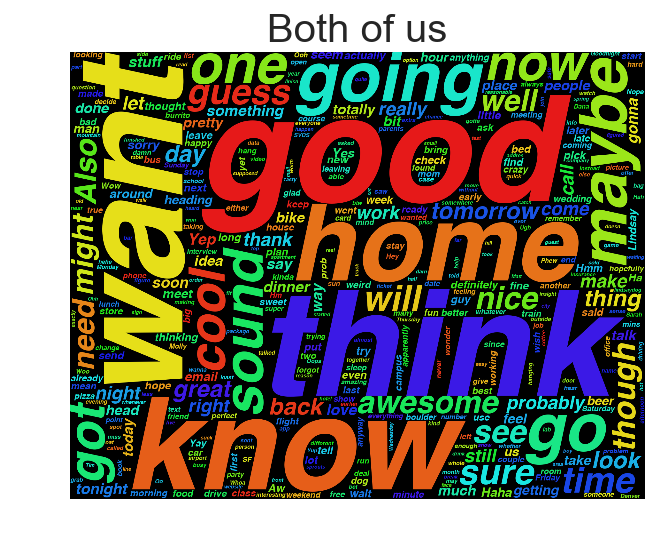

In [16]:
plt.imshow(wordcloud_both)
plt.axis('off')
plt.title('Both of us', fontsize=20)
plt.savefig('./wordcloud_both.png', dpi=300)
plt.show()

In [17]:
wordcloud_matt = WordCloud(font_path=font_path,
                           stopwords=stopwords,
                           background_color=background_color,
                           width=width,
                           height=height,
                           scale=scale,
                           ranks_only=ranks_only,
                           max_words=max_words
                           ).generate(matt_clean)

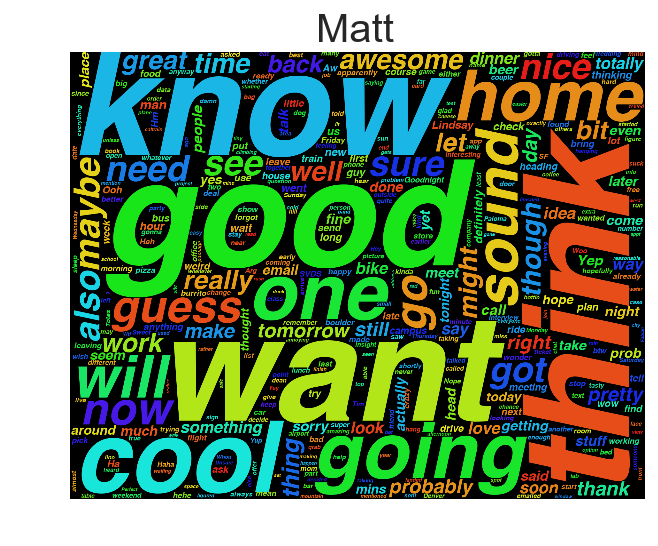

In [18]:
plt.imshow(wordcloud_matt)
plt.axis('off')
plt.title('Matt', fontsize=20)
plt.savefig('./wordcloud_matt.png', dpi=300)
plt.show()

In [19]:
wordcloud_alice = WordCloud(font_path=font_path,
                           stopwords=stopwords,
                           background_color=background_color,
                           width=width,
                           height=height,
                           scale=scale,
                           ranks_only=ranks_only,
                           max_words=max_words
                           ).generate(alice_clean)

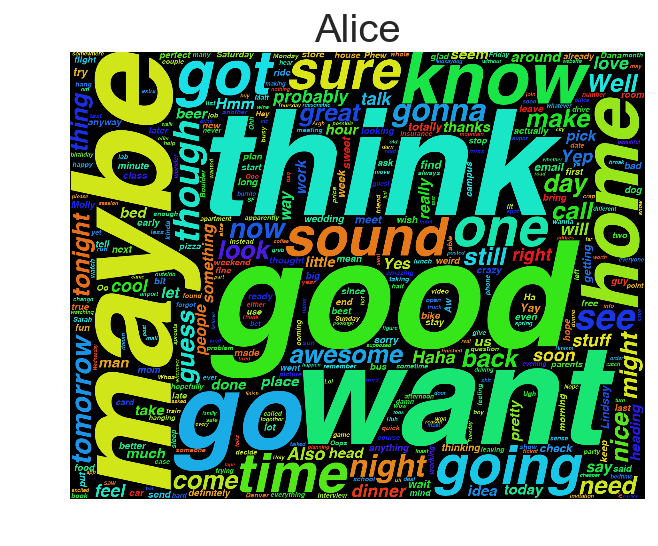

In [20]:
plt.imshow(wordcloud_alice)
plt.axis('off')
plt.title('Alice', fontsize=20)
plt.savefig('./wordcloud_alice.png', dpi=300)
plt.show()

In [21]:
df['love'] = ['lov' in text.lower() for text in df['text']]

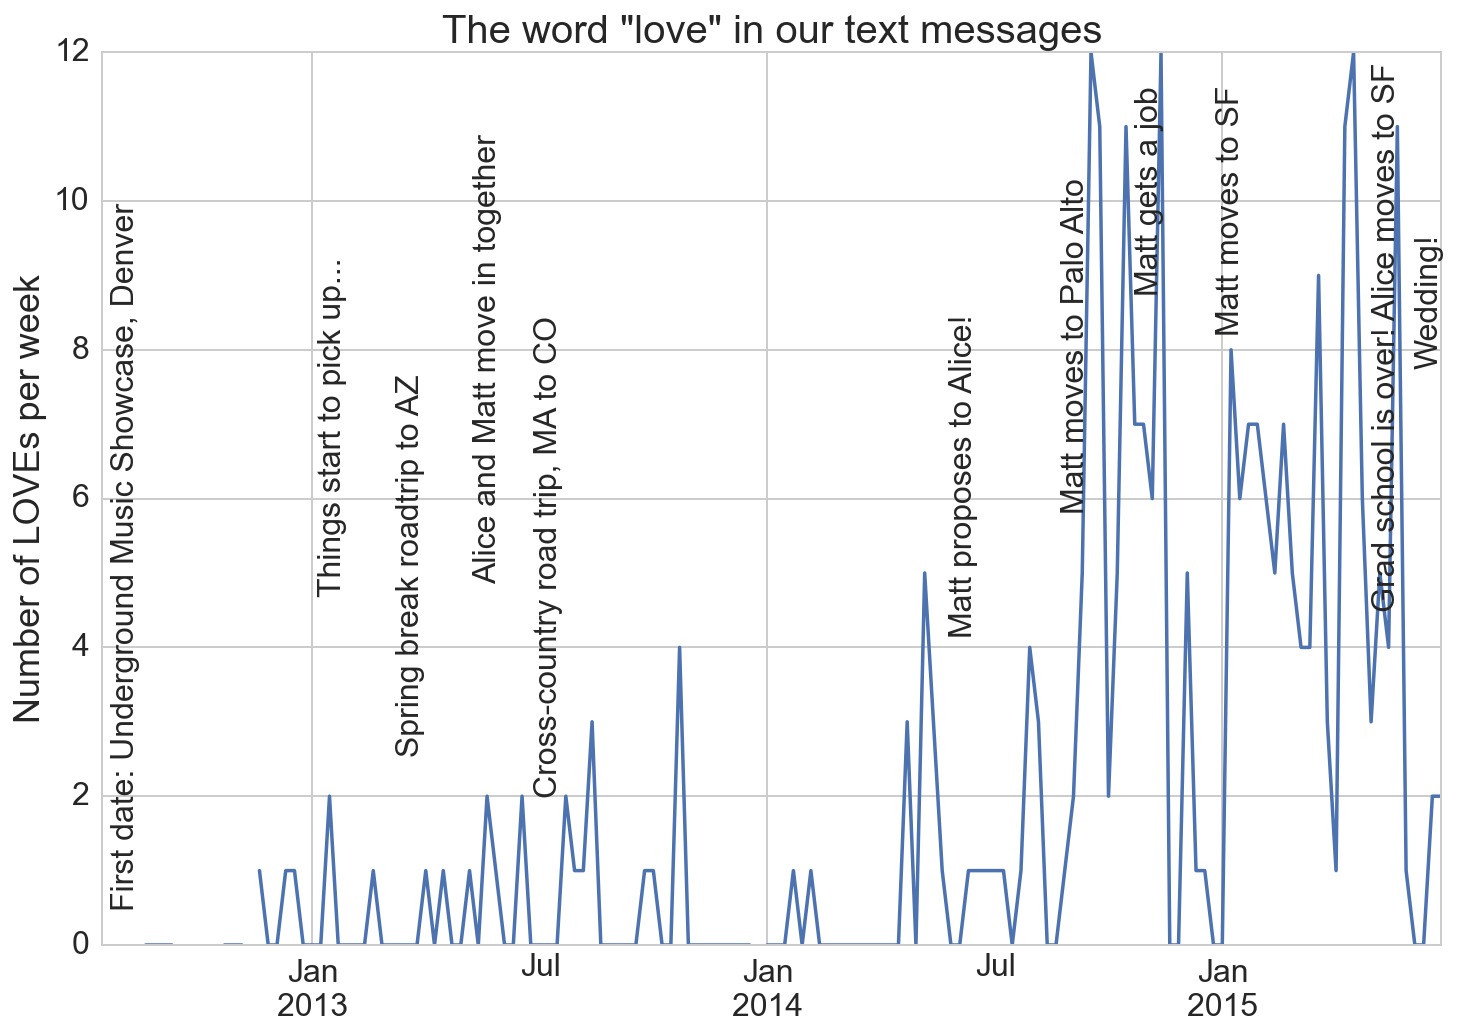

In [66]:
fig, ax = plt.subplots(figsize=(12,8))

df['love'].resample('W', how='sum').plot(ax=ax, fontsize=16)

ax.set_title('The word "love" in our text messages', fontsize=20);

ax.set_xlabel('', fontsize=16);
ax.set_ylabel('Number of LOVEs per week', fontsize=18);

rotation=90
textsize=16

fig.text(.13, .75, 'First date: Underground Music Showcase, Denver', fontsize=textsize, rotation=rotation);
fig.text(.25, .7, 'Things start to pick up...', fontsize=textsize, rotation=rotation);
fig.text(.295, .6, 'Spring break roadtrip to AZ', fontsize=textsize, rotation=rotation);
fig.text(.34, .81, 'Alice and Matt move in together', fontsize=textsize, rotation=rotation);
fig.text(.375, .65, 'Cross-country road trip, MA to CO', fontsize=textsize, rotation=rotation);
fig.text(.615, .65, 'Matt proposes to Alice!', fontsize=textsize, rotation=rotation);
fig.text(.68, .77, 'Matt moves to Palo Alto', fontsize=textsize, rotation=rotation);
fig.text(.723, .85, 'Matt gets a job', fontsize=textsize, rotation=rotation);
fig.text(.77, .85, 'Matt moves to SF', fontsize=textsize, rotation=rotation);
fig.text(.86, .87, 'Grad school is over! Alice moves to SF', fontsize=textsize, rotation=rotation);
fig.text(.885, .72, 'Wedding!', fontsize=textsize, rotation=rotation);

fig.savefig('texts_love.png')

In [23]:
# normlized by messages per week
loveperweek = df['love'].resample('W', how='sum').div(df['love'].resample('W', how='count'))

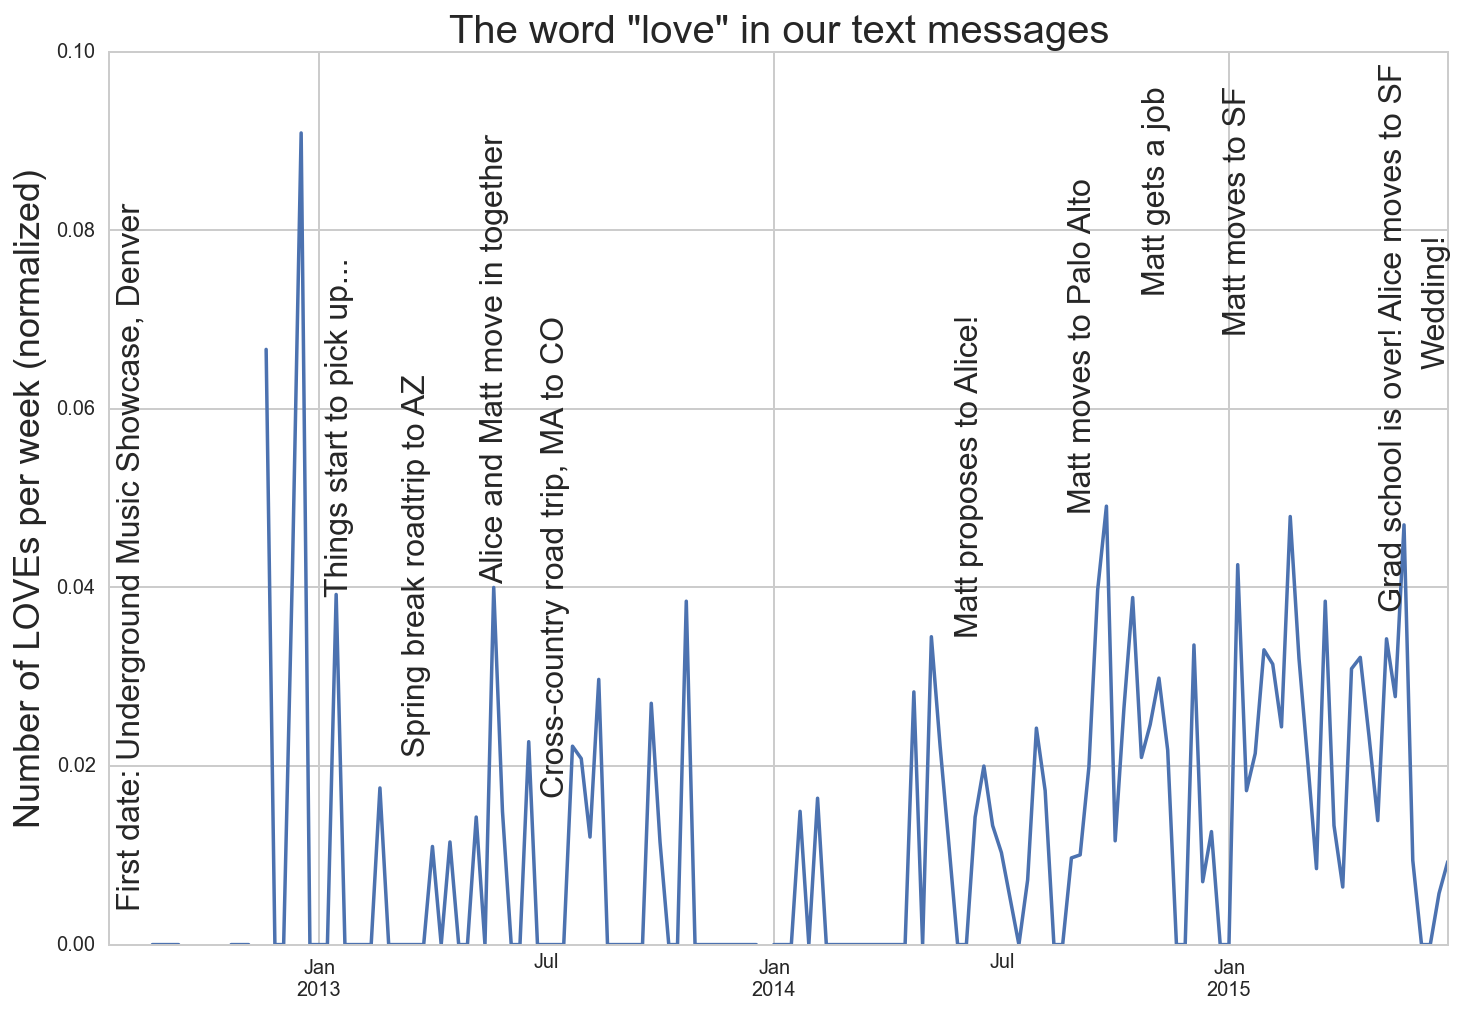

In [67]:
fig, ax = plt.subplots(figsize=(12,8))
loveperweek.plot(ax=ax)
# ax.set_ylabel('LOVEs per week')

ax.set_title('The word "love" in our text messages', fontsize=20);

ax.set_xlabel('', fontsize=16);
ax.set_ylabel('Number of LOVEs per week (normalized)', fontsize=18);

rotation=90
textsize=16

fig.text(.13, .75, 'First date: Underground Music Showcase, Denver', fontsize=textsize, rotation=rotation);
fig.text(.25, .7, 'Things start to pick up...', fontsize=textsize, rotation=rotation);
fig.text(.295, .6, 'Spring break roadtrip to AZ', fontsize=textsize, rotation=rotation);
fig.text(.34, .81, 'Alice and Matt move in together', fontsize=textsize, rotation=rotation);
fig.text(.375, .65, 'Cross-country road trip, MA to CO', fontsize=textsize, rotation=rotation);
fig.text(.615, .65, 'Matt proposes to Alice!', fontsize=textsize, rotation=rotation);
fig.text(.68, .77, 'Matt moves to Palo Alto', fontsize=textsize, rotation=rotation);
fig.text(.723, .85, 'Matt gets a job', fontsize=textsize, rotation=rotation);
fig.text(.77, .85, 'Matt moves to SF', fontsize=textsize, rotation=rotation);
fig.text(.86, .87, 'Grad school is over! Alice moves to SF', fontsize=textsize, rotation=rotation);
fig.text(.885, .72, 'Wedding!', fontsize=textsize, rotation=rotation);

fig.savefig('texts_love_normalized.png')

In [25]:
import emoji_parse as smp #loads the package

In [26]:
counter = smp.EmojiDict() #initializes the EmojiDict class

#goes through list of unicode objects calling the add_emoji_count method for each string
#the method keeps track of the emoji count in the attributes of the instance
for unicode_string in df['text']:
   counter.add_emoji_count(unicode_string)

emodf = pd.DataFrame.from_dict(counter.dict_total, orient='index')
emodf.columns = ['count']
emodf = emodf[emodf['count'] > 0].sort(['count'], ascending=False)

emodf.columns = ['Both of us']

In [27]:
emodf.ix[:20,]

,Both of us
😊,468
😘,148
😃,96
👍,86
❤️,71
😄,58
😟,57
😉,55
😍,47
☺️,38


In [28]:
counter_matt = smp.EmojiDict() #initializes the EmojiDict class

#goes through list of unicode objects calling the add_emoji_count method for each string
#the method keeps track of the emoji count in the attributes of the instance
for unicode_string in df[df['from'] == 'Matt']['text']:
   counter_matt.add_emoji_count(unicode_string)

emodf_matt = pd.DataFrame.from_dict(counter_matt.dict_total, orient='index')
emodf_matt.columns = ['count']
emodf_matt = emodf_matt[emodf_matt['count'] > 0].sort(['count'], ascending=False)
emodf_matt.columns = ['Matt']

In [29]:
emodf_matt.ix[:20,]

,Matt
😊,242
😘,67
👍,36
❄️,23
😍,22
😉,21
✈️,17
🐶,16
❤️,16
💩,16


In [30]:
counter_alice = smp.EmojiDict() #initializes the EmojiDict class

#goes through list of unicode objects calling the add_emoji_count method for each string
#the method keeps track of the emoji count in the attributes of the instance
for unicode_string in df[df['from'] == 'Alice']['text']:
   counter_alice.add_emoji_count(unicode_string)

emodf_alice = pd.DataFrame.from_dict(counter_alice.dict_total, orient='index')
emodf_alice.columns = ['count']
emodf_alice = emodf_alice[emodf_alice['count'] > 0].sort(['count'], ascending=False)

emodf_alice.columns = ['Alice']

In [31]:
emodf_alice.ix[:20,]

,Alice
😊,226
😘,81
😃,81
❤️,55
👍,50
😄,43
😟,41
😉,34
😍,25
☺️,24


In [32]:
import matplotlib.font_manager as fm
import matplotlib

In [33]:
font = fm.FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttf')
# font.set_size('medium')

In [34]:
# matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['font.family'] = font.get_name()

RuntimeError: Could not set the fontsize for facefile  /System/Library/Fonts/Apple Color Emoji.ttf


In [ ]:
ax = emodf.ix[:10,].plot(kind='barh')
ax.yaxis.label.set_font_properties(font)

In [ ]:
# #output of the instance
# print counter.dict_total #dict of the absolute total count of the emojis in corpus
# print counter.dict       #dict of the count of strings with the emoji in corpus
# print counter.baskets    #list of lists, emoji in each string.  one list for each string.

# # counter.create_csv(file='emoji_out.csv')  #method for creating csv